In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_excel('KolayGelsin-Call-Center-Data.xlsx', sheet_name='KPI VERİLERİ',index_col=0)

In [3]:
df

,Haftanın Günü,Gelen Çağrı,Cevaplanan Çağrı,Kaçan Çağrı,Kısa Çağrı,Net Kaçan,AR %,SL %,AHT,30 Sn İçerisinde Kaçan,SL İçerisinde Yanıtlanan,"Konuşma Süresi dk,","Ort, Cevaplanma Hızı Sn,","MAX, Bekleme Süresi Sn,",MÜŞTERİYE İLETİLEN FORECAST ADETLERİ,DAĞITIMA ÇIKAN GÖNDERİ ADETLERİ
Date,,,,,,,,,,,,,,,,
2023-11-11,Cumartesi,3361,3055.0,306.0,50.0,256.0,0.909000,0.739100,189.000000,83.0,2258.0,9622.800000,37.200000,300.0,7671.0,70015.0
2023-10-11,Cuma,3814,3753.0,61.0,50.0,11.0,0.984000,0.956000,183.300000,54.0,3588.0,11463.400000,7.800000,148.0,6933.0,76309.0
2023-09-11,Perşembe,3713,3670.0,43.0,37.0,6.0,0.988400,0.973600,178.100000,42.0,3573.0,10891.200000,7.300000,274.0,6685.0,75415.0
2023-08-11,Çarşamba,4070,4022.0,48.0,38.0,10.0,0.988200,0.982800,181.300000,42.0,3953.0,12153.800000,7.000000,163.0,7627.0,88106.0
2023-07-11,Salı,3878,3837.0,41.0,36.0,5.0,0.989400,0.995800,180.600000,37.0,3821.0,11550.300000,6.100000,237.0,7235.0,80246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-12,Cuma,2957,2831.0,126.0,33.0,93.0,0.957389,0.926881,156.891558,45.0,2624.0,7402.666667,16.213392,404.0,NaN,44028.0
2022-08-11,Perşembe,3314,3106.0,208.0,35.0,173.0,0.937236,0.891500,172.259498,52.0,2769.0,8917.300000,19.966807,554.0,NaN,46120.0
2022-08-10,Çarşamba,3624,3368.0,256.0,38.0,218.0,0.929360,0.747922,169.775831,88.0,2519.0,9530.083333,25.839404,431.0,NaN,51410.0


In [4]:
calls_all = np.array(df.iloc[:,1])
calls = calls_all[::-1]

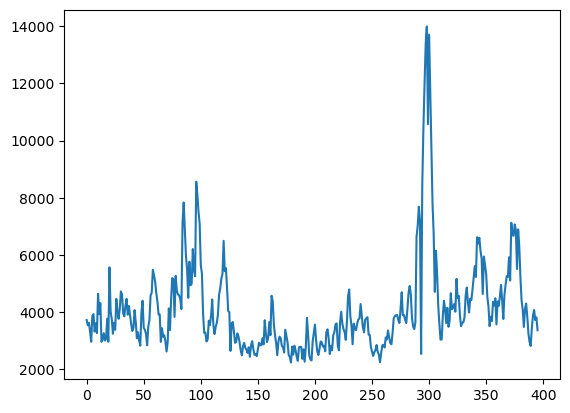

In [5]:
plt.plot(calls)

In [6]:
sd_calls = [0]*len(calls)

for i in range(7,len(calls)):
    sd_calls[i] = calls[i] - calls[i-6]
    
diff_sd_calls = np.diff(sd_calls)

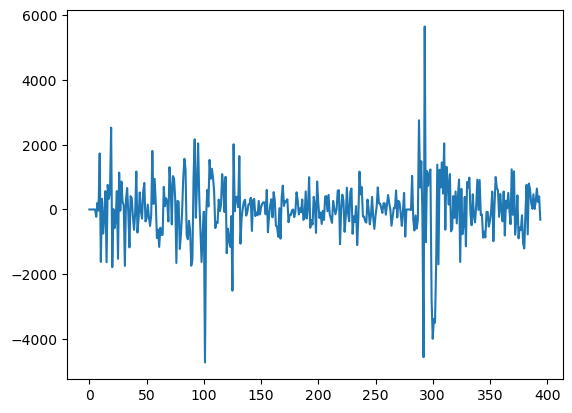

In [7]:
plt.plot(diff_sd_calls)

C:\Users\Ahmet\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


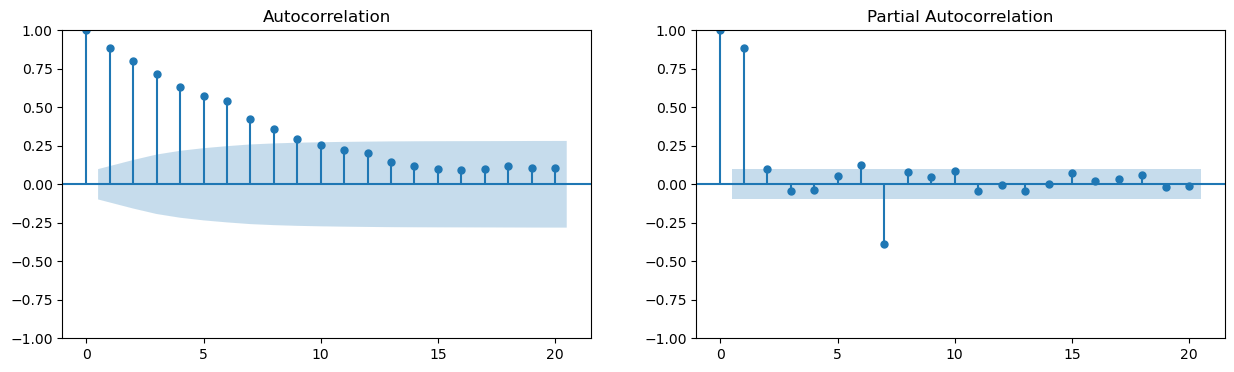

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(calls, lags=20, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(calls, lags=20, ax=axes[1])

In [9]:
# First 80% of the data is training data and last 20% of the data is test data

calls_train = calls[:round(len(calls)*0.8)]
calls_test = calls[round(len(calls)*0.8):]

In [10]:
# ARIMA Train Data

arima_mod_train = sm.tsa.arima.ARIMA(calls_train, order=(1, 0, 0))

res_arima_train = arima_mod_train.fit()
print(res_arima_train.summary())

arima_train_pred = res_arima_train.predict()

mse_arima_train = np.mean(np.square(res_arima_train.resid))
rmse_arima_train = np.sqrt(mse_arima_train)
mae_arima_train = np.mean(np.abs(res_arima_train.resid))
mape_arima_train = np.mean(np.abs(res_arima_train.resid) / calls_train)

print('MSE ARIMA TRAIN = ', mse_arima_train)
print('RMSE ARIMA TRAIN = ', rmse_arima_train)
print('MAE ARIMA TRAIN = ', mae_arima_train)
print('MAPE ARIMA TRAIN = ', mape_arima_train)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  317
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2574.447
Date:                Fri, 19 Jan 2024   AIC                           5154.895
Time:                        20:57:57   BIC                           5166.171
Sample:                             0   HQIC                          5159.399
                                - 317                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3943.6625    519.201      7.596      0.000    2926.047    4961.278
ar.L1          0.8824      0.015     59.692      0.000       0.853       0.911
sigma2       6.62e+05   2.27e+04     29.138      0.0

In [11]:
# ARIMA Test Data

arima_mod_test = sm.tsa.arima.ARIMA(calls_test, order=(1, 0, 0))

res_arima_test = arima_mod_test.filter(res_arima_train.params)
print(res_arima_test.summary())

arima_test_pred = res_arima_test.predict()

mse_arima_test = np.mean(np.square(res_arima_test.resid))
rmse_arima_test = np.sqrt(mse_arima_test)
mae_arima_test = np.mean(np.abs(res_arima_test.resid))
mape_arima_test = np.mean(np.abs(res_arima_test.resid) / calls_test)

print('MSE ARIMA TEST = ', mse_arima_test)
print('RMSE ARIMA TEST = ', rmse_arima_test)
print('MAE ARIMA TEST = ', mae_arima_test)
print('MAPE ARIMA TEST = ', mape_arima_test)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   79
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -624.745
Date:                Fri, 19 Jan 2024   AIC                           1255.489
Time:                        20:57:58   BIC                           1262.597
Sample:                             0   HQIC                          1258.337
                                 - 79                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3943.6625   1589.934      2.480      0.013     827.448    7059.877
ar.L1          0.8824      0.134      6.578      0.000       0.619       1.145
sigma2       6.62e+05   1.52e+05      4.361      0.0

In [12]:
# SARIMA Train Data

sarima_mod_train = sm.tsa.statespace.SARIMAX(calls_train, trend='c', 
                                             order=(1,0,0),
                                             seasonal_order=(1,0,0,6))

res_sarima_train = sarima_mod_train.fit()
print(res_sarima_train.summary())

x_train_pred = res_sarima_train.get_prediction()

mse_x_train = np.mean(np.square(res_sarima_train.resid))
rmse_x_train = np.sqrt(mse_x_train)
mae_x_train = np.mean(np.abs(res_sarima_train.resid))
mape_x_train = np.mean(np.abs(res_sarima_train.resid) / (calls_train))

print('MSE SARIMA TRAIN = ', mse_x_train)
print('RMSE SARIMA TRAIN = ', rmse_x_train)
print('MAE SARIMA TRAIN = ', mae_x_train)
print('MAPE SARIMA TRAIN = ', mape_x_train)

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  317
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 6)   Log Likelihood               -2554.667
Date:                           Fri, 19 Jan 2024   AIC                           5117.333
Time:                                   20:57:58   BIC                           5132.369
Sample:                                        0   HQIC                          5123.339
                                           - 317                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    442.1881     86.332      5.122      0.000     272.981     611.395
ar.L1          0.8388      0.019     44.613

In [13]:
# SARIMA Test Data

sarima_mod_test = sm.tsa.statespace.SARIMAX(calls_test, trend='c', 
                                            order=(1,0,0),
                                            seasonal_order=(1,0,0,6))

res_sarima_test = sarima_mod_test.filter(res_sarima_train.params)
print(res_sarima_test.summary())

x_test_pred = res_sarima_test.get_prediction()

mse_x_test = np.mean(np.square(res_sarima_test.resid))
rmse_x_test = np.sqrt(mse_x_test)
mae_x_test = np.mean(np.abs(res_sarima_test.resid))
mape_x_test = np.mean(np.abs(res_sarima_test.resid) / (calls_test))

print('MSE SARIMA TEST = ', mse_x_test)
print('RMSE SARIMA TEST = ', rmse_x_test)
print('MAE SARIMA TEST = ', mae_x_test)
print('MAPE SARIMA TEST = ', mape_x_test)

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   79
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 6)   Log Likelihood                -617.120
Date:                           Fri, 19 Jan 2024   AIC                           1242.241
Time:                                   20:57:58   BIC                           1251.719
Sample:                                        0   HQIC                          1246.038
                                            - 79                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    442.1881    560.874      0.788      0.430    -657.104    1541.480
ar.L1          0.8388      0.160      5.255

In [14]:
# Values that are predicted by SARIMA model on test data

res_sarima_test.fittedvalues

array([4121.98968066, 3560.70494514, 3743.86884501, 4525.1508698 ,
       4054.8249111 , 4101.51059151, 4177.46480542, 4068.77068405,
       5286.96040792, 4269.3158839 , 4515.31366426, 3951.49888559,
       3520.41320605, 4081.96801829, 3544.2407647 , 3905.55051571,
       4285.53844374, 4599.15001589, 4316.36182192, 3980.82153254,
       4439.97043735, 4603.88714996, 4790.67438747, 4891.69318932,
       5256.08799243, 5201.69925692, 6217.0414783 , 6164.79842214,
       6377.42612926, 6017.84847695, 5544.68980914, 5074.89189002,
       5709.7223966 , 5594.39247371, 5115.53986377, 4480.44151215,
       3862.09472085, 4070.77966735, 3881.14719006, 3725.90255051,
       4119.57190037, 4118.56970225, 4196.11968158, 3731.959804  ,
       4263.4858028 , 4402.06007709, 4430.19635962, 4906.05243438,
       4068.81380779, 4053.87261034, 4480.9666142 , 4927.66761293,
       5234.79153981, 4905.29753127, 5423.90530733, 5206.82273361,
       6783.22898711, 6431.64164938, 6306.40525092, 6883.39110

In [15]:
res_sarima_test.forecast(30)

array([3625.14576191, 3813.6424185 , 3914.45327018, 3825.62795741,
       3885.14562082, 3755.10101109, 3861.5974362 , 3939.85823941,
       3986.32523016, 3967.27153337, 3996.14494021, 3960.13080257,
       4002.0727419 , 4033.54894822, 4053.53231064, 4050.87227428,
       4063.65344633, 4054.21497138, 4070.44567308, 4082.81998839,
       4091.05118045, 4091.45514239, 4096.81837816, 4094.56997239,
       4100.76586983, 4105.54794803, 4108.84009536, 4109.42594631,
       4111.5989341 , 4111.16346472])

In [16]:
res_sarima_test.get_forecast(30).summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,3625.145762,760.169300,2135.241312,5115.050212
1,3813.642418,992.164474,1869.035784,5758.249053
2,3914.453270,1127.117365,1705.343828,6123.562712
3,3825.627957,1213.096007,1448.003473,6203.252441
4,3885.145621,1270.100628,1395.794134,6374.497108
5,3755.101011,1308.717367,1190.062105,6320.139917
6,3861.597436,1407.910930,1102.142720,6621.052152
7,3939.858239,1473.699962,1051.459389,6828.257090
8,3986.325230,1518.276446,1010.558078,6962.092382
9,3967.271533,1548.868232,931.545583,7002.997484


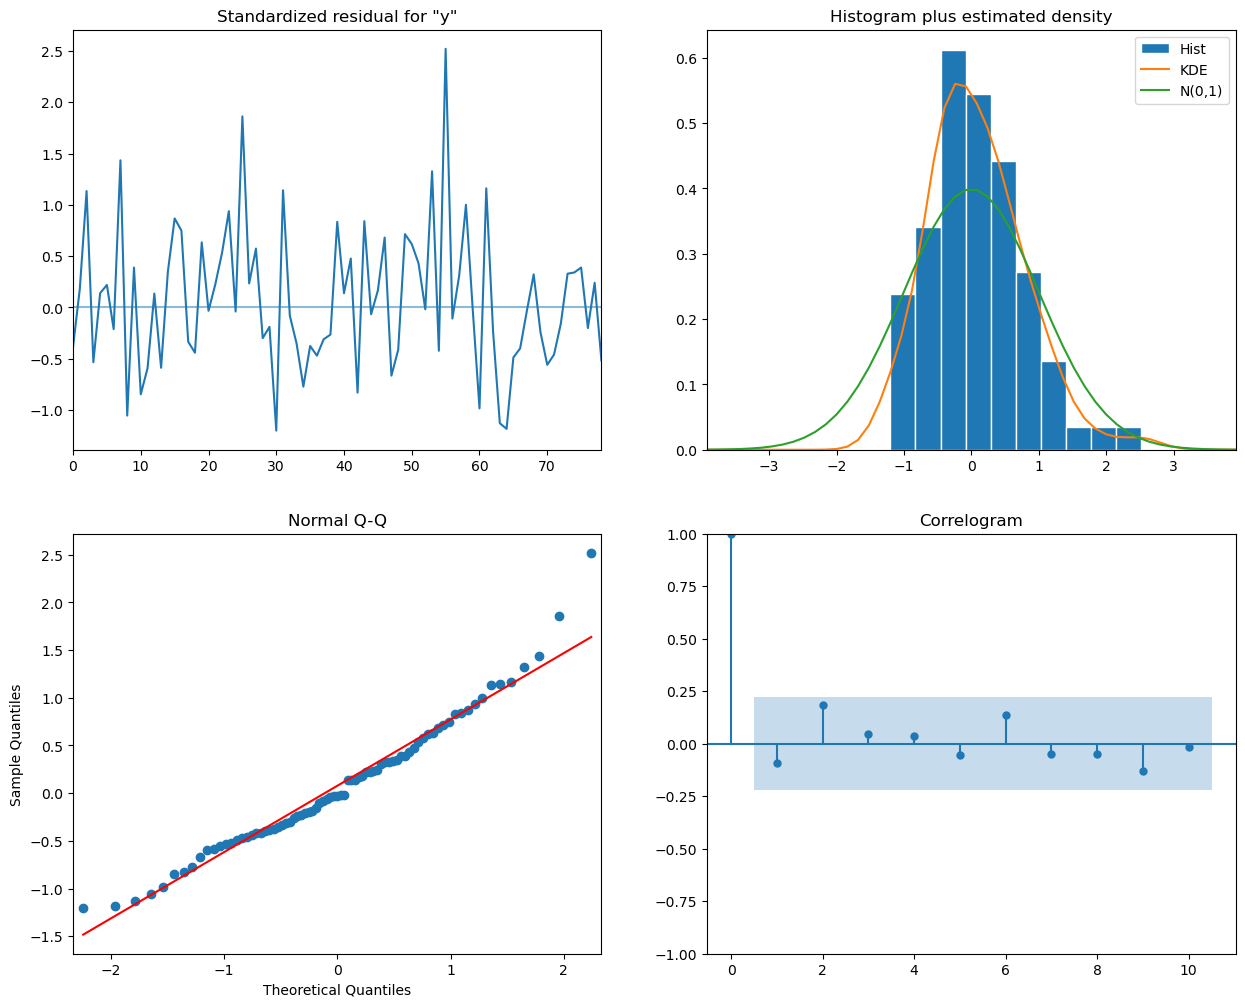

In [17]:
res_sarima_test.plot_diagnostics(figsize=(15,12))
plt.show()

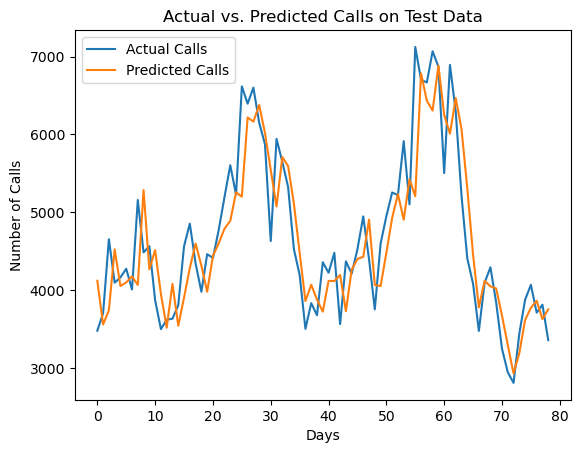

In [18]:
# Compare the plots of actual calls and predicted calls on test data.

plt.plot(calls_test, label = 'Actual Calls')
plt.plot(res_sarima_test.fittedvalues, label = 'Fitted Calls')
plt.legend(loc = 'upper left')

plt.xlabel('Days') 
plt.ylabel('Number of Calls') 
plt.title('Actual vs. Predicted Calls on Test Data')

plt.show()

In [ ]:
plt.plot(res_sarima_test.forecast(30) , 